# Simple Hybrid Example - Basic Tau Hybrid Solver

The hybrid solver is capable of solving models which include both discrete and continuous species.  In order for a species to be considered continuously, it must be included in a rate_rule, along with it's rate of change.  This species can then be considered in reactions by explicitly declaring the species as part of the reaction's propensity function.

### Imports

In [1]:
import sys, os, numpy
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../../')))
import gillespy2


### Instantiate Model
Model requires species, parameters, and reactions.  rate_rules can also be added to model a species continuously

In [2]:

class SimpleHybridModel(gillespy2.Model):
     def __init__(self, parameter_values=None, init_v=1):
            #initialize Model
            gillespy2.Model.__init__(self, name="Simple_Hybrid_Model")

            
            #Species
            A = gillespy2.Species(name='A', initial_value=0)
            '''
            Setting the continuous species.mode to "continuous" will prevent this species from being
            considered discretely, and allows it to be modeled continuously with a rate rule.
            '''
            V = gillespy2.Species(name='V', initial_value=init_v, mode='continuous')

            self.add_species([A, V])
            
            #parameters
            rate1 = gillespy2.Parameter(name='rate1', expression= 20.0)
            rate2 = gillespy2.Parameter(name='rate2', expression= 10.0)
            
            #rate_rules
            '''We create a rate rule with two arguments.  The first is the species
            we intend to associate the rate rule with.  In this case, we choose our
            previously declared continuous species "V" and give it the rate function of
            cos(t).
            '''
            rate_rule1 = gillespy2.RateRule(variable=V, formula="cos(t)")
            self.add_parameter([rate1, rate2])
            self.add_rate_rule([rate_rule1])
            
            #reactions
            '''
            Because we want to use our continuous species "V" in the propensity function
            for r1, we associate a custom propensity function, rather than a simple rate.
            Here we can simply use the rate times our continuous species "V".'''
            r1 = gillespy2.Reaction(name="r1",reactants={}, products={A:1},
                   propensity_function="rate1 * V")
            
            r2 = gillespy2.Reaction(name="r2",reactants={A:1}, products={},
                    rate=rate2)
            
            self.add_reaction([r1, r2])
            self.timespan(numpy.linspace(0, 100, 101))

In [3]:
model = SimpleHybridModel()

### Run Model and Plot

In [4]:
%time results = model.run()

CPU times: user 984 ms, sys: 29.6 ms, total: 1.01 s
Wall time: 950 ms


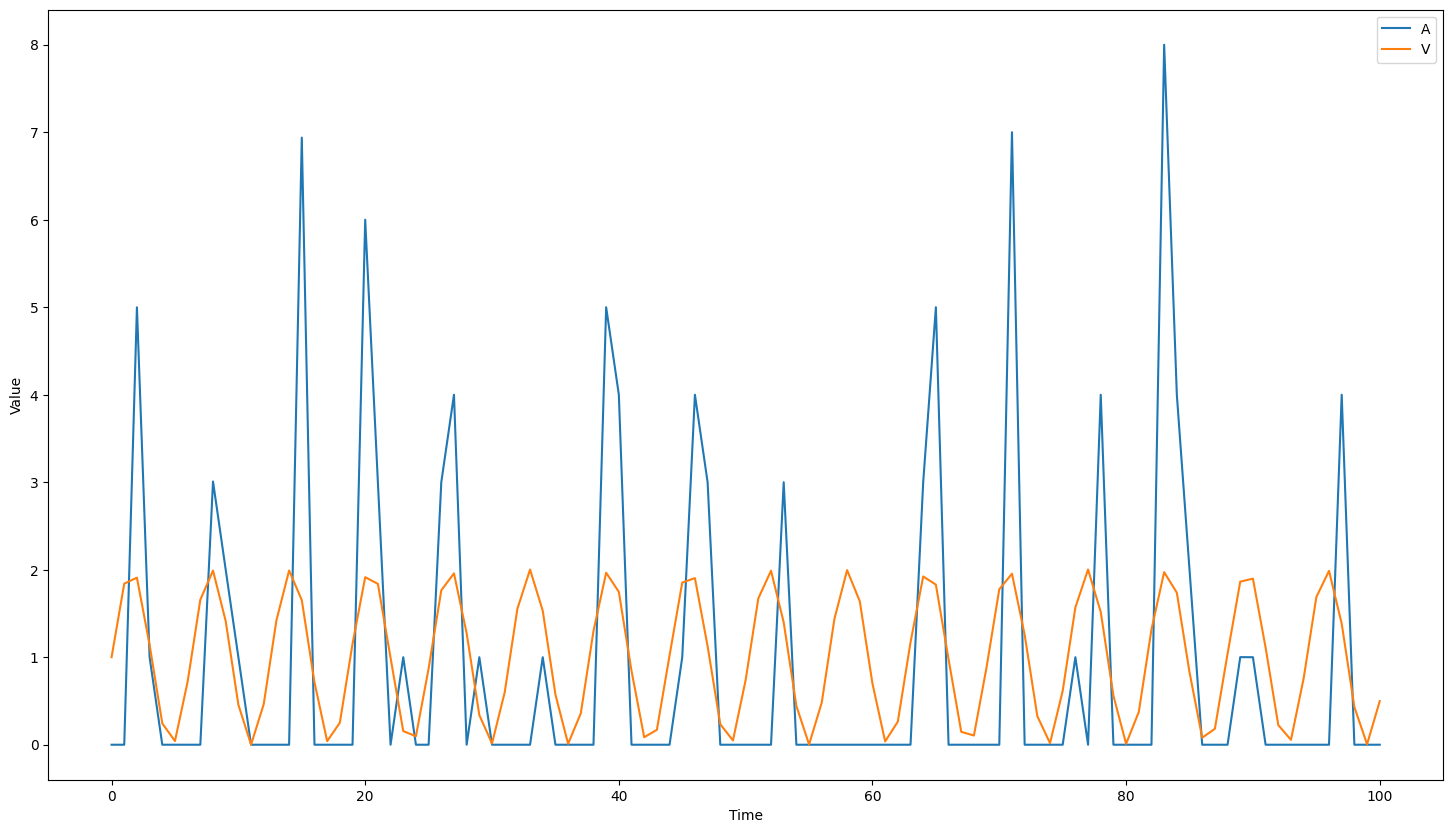

In [5]:
results.plot()